# Project 2 DAT 402:

DAT 402<br>
Marko Samara<br>
Brenden Ziemann<br>


For my project I looked at lung cancer data and compared lasso/ridge regression to naive bayes. I also did the same thing with diabetes data.

## Part 1 of Project: Lasso and Ridge Regression
Lasso and Ridge regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable (like Yes and No, 1 and 0, True and False)

This first part looks at Ridge Regression and Lasso Regression. Similar to the lasso regression, ridge regression puts a similar constraint on the coefficients by introducing a penalty factor. However, while lasso regression takes the magnitude of the coefficients, ridge regression takes the square
### Part a) Lung Cancer Data Ridge Regression

Data found from Data World:

Found here:
https://data.world/sta427ceyin/survey-lung-cancer

In [1]:
library(tidyr)
library(ggplot2)
library(testthat)
library(digest)
library(stringr)
library(glmnet) #to do logistic regression with regularization
library(pROC) #used for plotting ROC curve

lung <- read.csv(file = 'surveyLungCancer.csv')
head(lung)


Attaching package: ‘testthat’


The following object is masked from ‘package:tidyr’:

    matches


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-3

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC.DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL.CONSUMING,COUGHING,SHORTNESS.OF.BREATH,SWALLOWING.DIFFICULTY,CHEST.PAIN,LUNG_CANCER
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
2,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
3,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
4,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
5,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
6,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES


### Data Cleaning

Looking at dimensions of the data set. There is 309 rows and 16 columns. With the column names listed below

In [2]:
dim(lung)
colnames(lung)

[1] 309  16

[1] "GENDER"                "AGE"                   "SMOKING"              
 [4] "YELLOW_FINGERS"        "ANXIETY"               "PEER_PRESSURE"        
 [7] "CHRONIC.DISEASE"       "FATIGUE"               "ALLERGY"              
[10] "WHEEZING"              "ALCOHOL.CONSUMING"     "COUGHING"             
[13] "SHORTNESS.OF.BREATH"   "SWALLOWING.DIFFICULTY" "CHEST.PAIN"           
[16] "LUNG_CANCER"

Attribute information:
1.	Gender: M(male), F(female)
2.	Age: Age of the patient
3.	Smoking:  YES=2 , NO=1.
4.	Yellow fingers: YES=2 , NO=1.
5.	Anxiety: YES=2 , NO=1.
6.	Peer_pressure: YES=2 , NO=1.
7.	Chronic Disease: YES=2 , NO=1.
8.	Fatigue: YES=2 , NO=1.
9.	Allergy: YES=2 , NO=1.
10.	Wheezing: YES=2 , NO=1.
11.	Alcohol: YES=2 , NO=1.
12.	Coughing: YES=2 , NO=1.
13.	Shortness of Breath: YES=2 , NO=1.
14.	Swallowing Difficulty: YES=2 , NO=1.
15.	Chest pain: YES=2 , NO=1.
16.	Lung Cancer: YES , NO.

Changing variable of Gender to 1 and 0 (1=M and 0=F)

In [3]:
lung$GENDER <- as.character(lung$GENDER)
lung[lung == "M"] <- 1      # Replace "M" by 1
lung[lung == "F"] <- 0       # Replace "F" by 0
lung$GENDER <- as.numeric(lung$GENDER)
head(lung)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC.DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL.CONSUMING,COUGHING,SHORTNESS.OF.BREATH,SWALLOWING.DIFFICULTY,CHEST.PAIN,LUNG_CANCER
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
2,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
3,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
4,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
5,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
6,0,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES


The data set had 2=yes and 1=no. I switched the values from 2 and 1 to 1 and 0 by subtracting all columns with 1 and 2 by 1

In [4]:
lung[,3:15] <- lung[,3:15] -1
head(lung)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC.DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL.CONSUMING,COUGHING,SHORTNESS.OF.BREATH,SWALLOWING.DIFFICULTY,CHEST.PAIN,LUNG_CANCER
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
2,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
3,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
4,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
5,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
6,0,75,0,1,0,0,1,1,1,1,0,1,1,0,0,YES


Checking for NA entries in the data set. After looking there is 0 NA's in the data set.

In [5]:
sum(is.na(lung))

[1] 0

### Age Distribution
As shownn in the histogram of Age in the Lung Cancer Data. The data only looks at ages 40 to 90 with a heavy look at ages 55 to 75. 

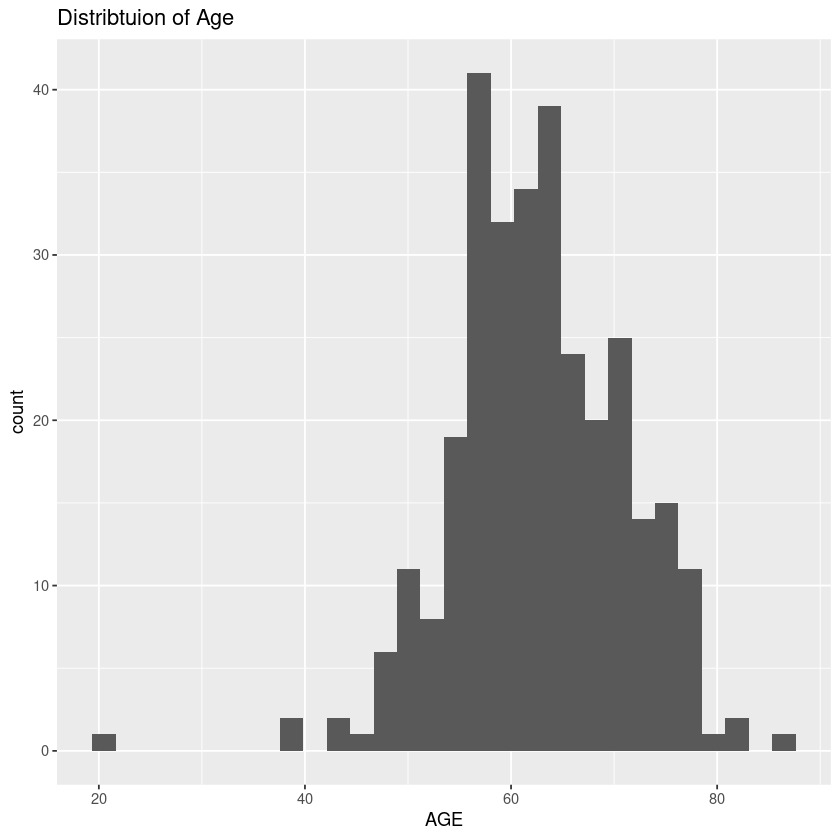

In [6]:
ggplot(lung, aes(x=AGE)) + geom_histogram(bins=30) + ggtitle("Distribtuion of Age") 

### Train-Test Split

Spliting the dataset into training and testing data at the ration 70/30. Proportions are shown below to check.

In [7]:
set.seed(4321) # set seed to get 4321 randomly for testing
trainidx = sample(1:nrow(lung),size=0.7*nrow(lung),replace=FALSE) #split by 70%


train = lung[trainidx, ] #train is first part
test = lung[-trainidx, ] #test is rest

dim(train) #see the dimensions of train data frame

#check the proportions 70%-30% of data taken into the train and test data frames
noquote(paste("proportion of train data:",nrow(train)/nrow(lung)))
noquote(paste("proportion of test data:",nrow(test)/nrow(lung)))

[1] 216  16

[1] proportion of train data: 0.699029126213592

[1] proportion of test data: 0.300970873786408

Response vector y and predictor matrix X from lung cancer without LUNG_CANCER variable

In [8]:
y = train$LUNG_CANCER #response vector y is LUNG_CANCER column
X = train[ ,!(names(train) %in% c("LUNG_CANCER"))] #all but Lung cancer variable
dim(X)

[1] 216  15

Predictor matrix X is actually an R data frame. In order to use it in the cv.glmnet() function, Converted it into an R matrix object

In [9]:
X = model.matrix( ~ . , data=X)[,-1]

dim(X)

X[1:5,]

[1] 216  15

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC.DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL.CONSUMING,COUGHING,SHORTNESS.OF.BREATH,SWALLOWING.DIFFICULTY,CHEST.PAIN
190,0,67,1,1,1,1,0,1,0,0,0,0,0,0,0
29,0,53,1,1,1,0,1,0,0,1,1,0,1,1,1
202,0,60,0,0,0,0,1,1,1,0,0,1,1,0,1
128,1,58,1,1,1,1,1,0,0,0,1,0,0,1,1
238,0,54,1,1,1,1,1,1,0,1,0,1,0,1,1


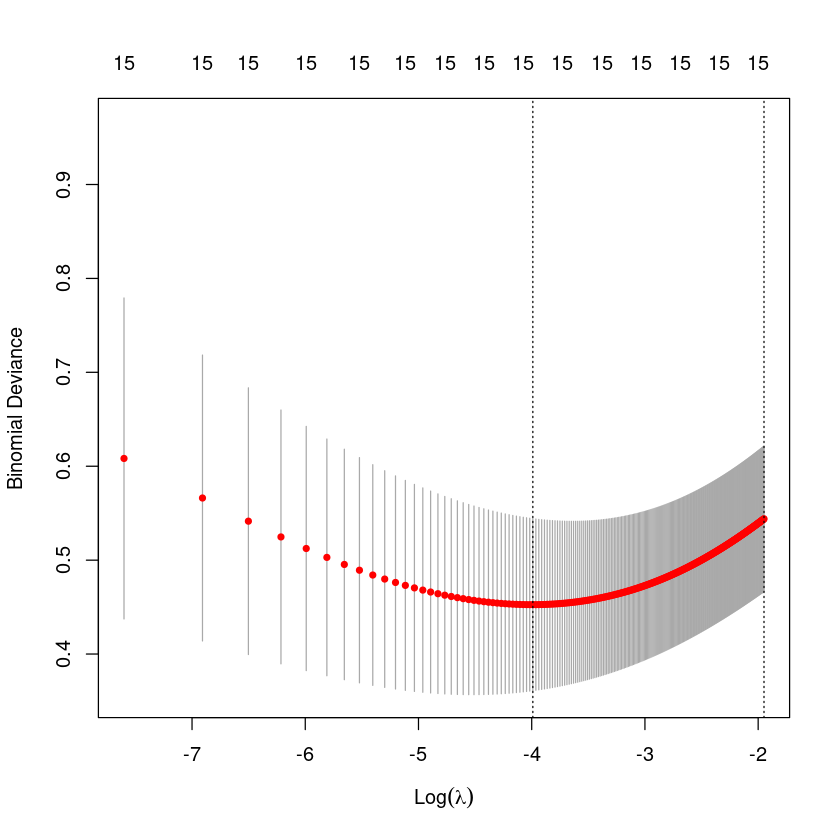

In [10]:
#setting lambda grid
mylambda=seq(0,0.1425,by=0.0005) 

#Here, we use deviance as a measure performance.

#by default, for logistic regression, type.measure is "deviance"
cvfit = cv.glmnet(X,y,family = "binomial",lambda=mylambda,type.measure="deviance",
                  nfolds = 10, alpha = 0)  #alpha- ridge:0, lasso:1
#plot Ridge based on deviance
plot(cvfit)  #plotting cvfit

In [11]:
#the value of optimal lambda that minimizes loss
cvfit$lambda.min

#the value of optimal lambda by the 1SE rule
cvfit$lambda.1se

[1] 0.0185

[1] 0.1425

Used coef(cvfit) to see the values of all the fitted coefficients

In [12]:
coef(cvfit)

16 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)           -1.529551544
GENDER                 0.077148579
AGE                    0.004896102
SMOKING                0.303856091
YELLOW_FINGERS         0.486708547
ANXIETY                0.348920519
PEER_PRESSURE          0.551865893
CHRONIC.DISEASE        0.519678089
FATIGUE                0.561549628
ALLERGY                0.708426537
WHEEZING               0.388295468
ALCOHOL.CONSUMING      0.673193064
COUGHING               0.526994671
SHORTNESS.OF.BREATH    0.180897931
SWALLOWING.DIFFICULTY  0.478446629
CHEST.PAIN             0.317497477

### Predicting on Test Data
To check performance, predict() function and have newx, which is the predictor matrix with the test data

In [13]:
ytest = test$LUNG_CANCER # test data is only LUNG_CANCER column
Xtest = test[ ,!(names(test) %in% c("LUNG_CANCER"))]  #everything but LUNG_CANCER

Xtest = model.matrix( ~ ., data=Xtest)[,-1] # change to matrix
pihat = predict(object=cvfit, newx = Xtest, type="response") #predict using the test data on cvfit model

length(pihat)
dim(Xtest)

[1] 93

[1] 93 15

### Measure Performace
I accessed performance using ROC curve and accuracy, as well as false negative rate (since we don't want our model to false predict no lung cancer when it does occur).

Setting levels: control = FALSE, case = TRUE

Warning message in roc.default(response = ylogical, predictor = pihat):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



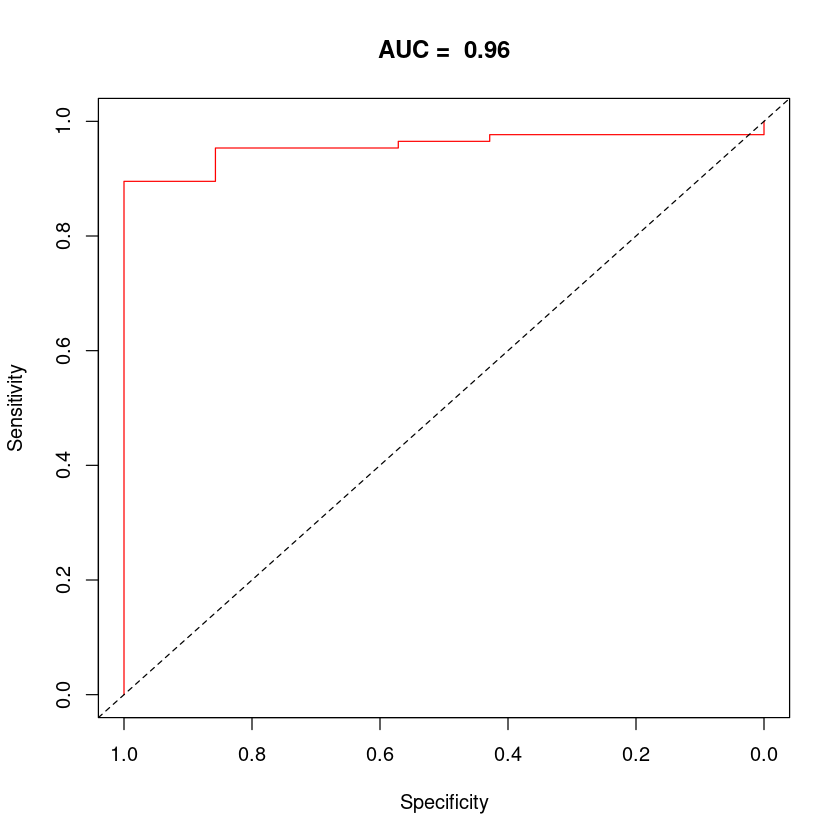

In [14]:
ylogical = (ytest == "YES")  # find all Yes's in test data
ROCcrv = roc(response=ylogical, predictor=pihat) # create a ROC curve
AUC = auc(ROCcrv) # get the area under the curve

plot(x=ROCcrv$specificities,y=ROCcrv$sensitivities, main=paste("AUC = ",round(AUC,2)), 
     xlab="Specificity", ylab="Sensitivity", xlim=c(1,0), type="l", col="red") # plot ROC curve

abline(a=1,b=-1,lty="dashed") #the diagonal line 


This ROC curve is really good for going towards the top left. An AUC of 0.5 suggests no discrimination (diagnose patients with and without the condition based on the test), 0.7 to 0.8 is considered accepted, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding. This model is outstaning for having AUC over 0.9.

In [15]:
#print the precise value of AUC (area under the curve)
AUC

Area under the curve: 0.9568

In [16]:
#creating yhat vector based on the rule: yhat=Yes if pihat>0.5; otherwise, yhat=No
yhat = ifelse(pihat>0.5,"Yes","No")

In [17]:
tbl = table(yhat, ytest)
tbl

     ytest
yhat  NO YES
  No   0   1
  Yes  7  85

In [18]:
# accuracy (proportion of correctly predicted)
(tbl[1,1]+tbl[2,2])/sum(tbl)

[1] 0.9139785

In [19]:
# false negative rate
tbl[1,2]/sum(tbl[,2])

[1] 0.01162791

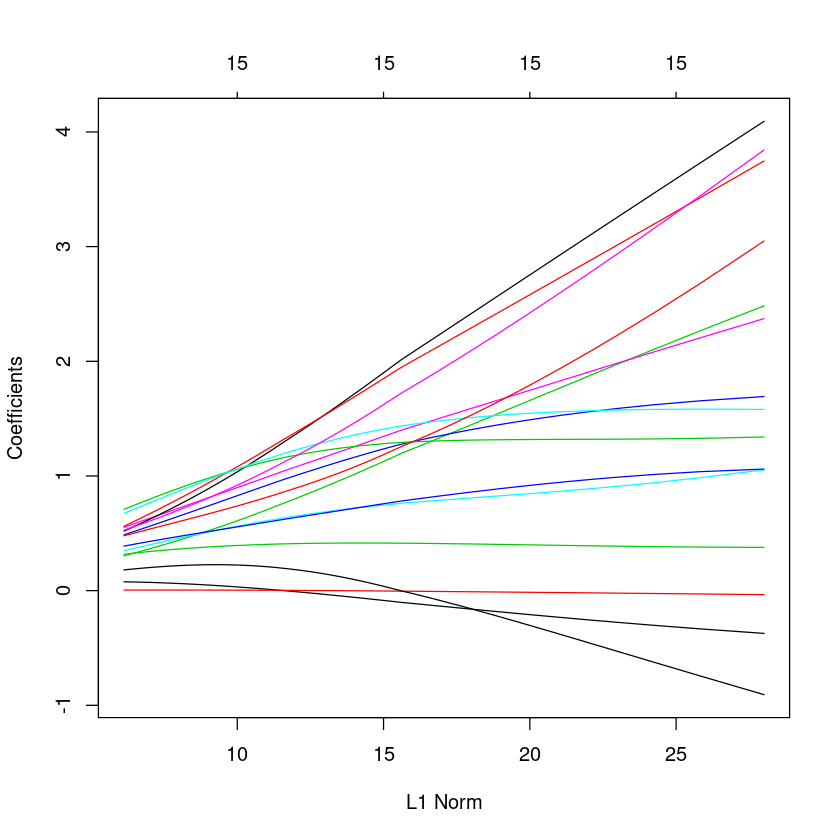

In [20]:
#beta coefficients for various models, i.e. various lambdas/flexibilities
plot(cvfit$glmnet.fit)

### Part b) Lung Cancer Lasso Regression

In [21]:
cvfit = cv.glmnet(X,y,family = "binomial",lambda=mylambda,type.measure="deviance",nfolds=10,alpha=1) # alpha=1 for lass regression
cvfit


Call:  cv.glmnet(x = X, y = y, lambda = mylambda, type.measure = "deviance",      nfolds = 10, family = "binomial", alpha = 1) 

Measure: Binomial Deviance 

    Lambda Index Measure      SE Nonzero
min 0.0080   270  0.4474 0.06366      12
1se 0.0235   239  0.5087 0.04615      11

In [22]:
coef(cvfit) # find coeficients 

16 x 1 sparse Matrix of class "dgCMatrix"
                               s1
(Intercept)           -2.02324062
GENDER                 .         
AGE                    .         
SMOKING                0.31324115
YELLOW_FINGERS         0.96785827
ANXIETY                .         
PEER_PRESSURE          0.83585393
CHRONIC.DISEASE        0.82048857
FATIGUE                1.04772382
ALLERGY                1.18802175
WHEEZING               0.14785985
ALCOHOL.CONSUMING      1.34553816
COUGHING               0.73645035
SHORTNESS.OF.BREATH    .         
SWALLOWING.DIFFICULTY  0.78752939
CHEST.PAIN             0.02849964

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”


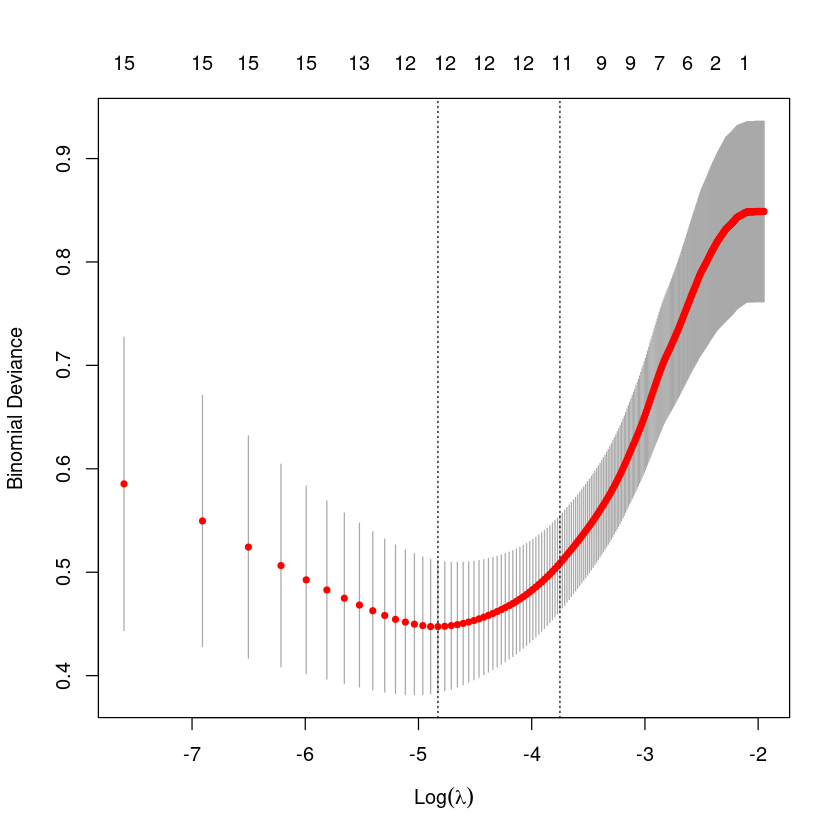

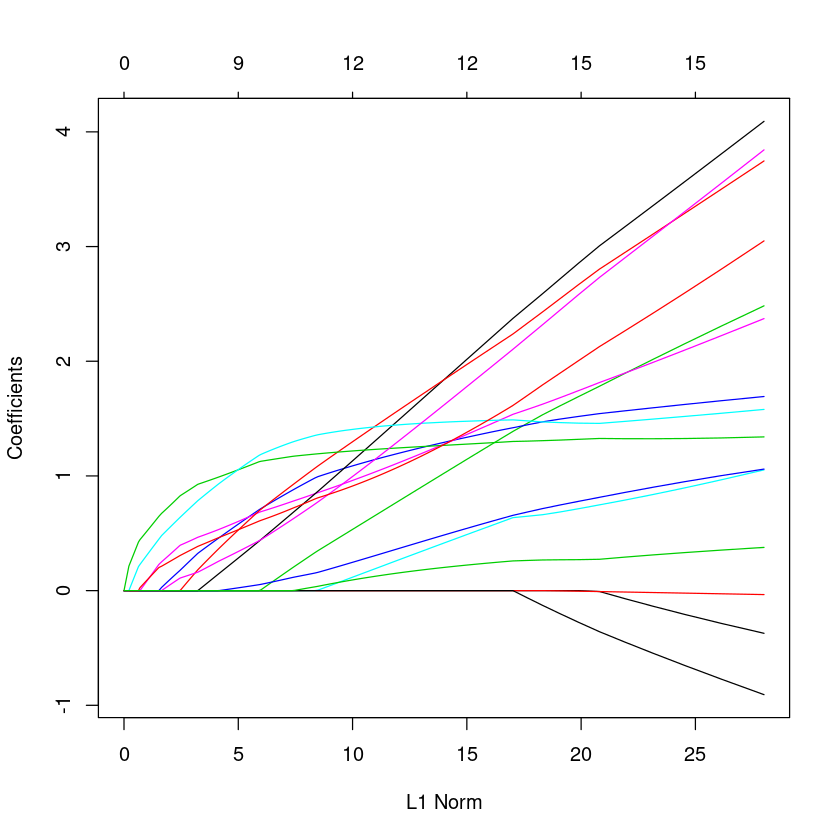

In [23]:
#plot Lasso based on deviance measure
plot(cvfit)  #plot the cvfit

#plot coefficients for various models; ignore the warning message
plot(cvfit$glmnet.fit)

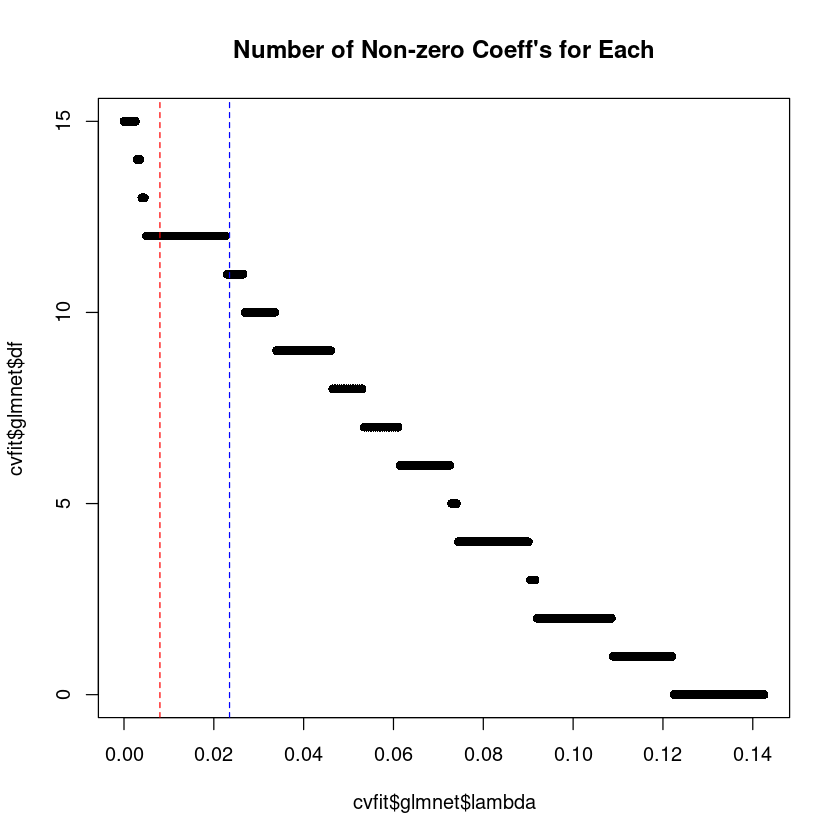

In [24]:
##Number of non-zero coefficients vs. $\lambda$
plot(cvfit$glmnet$lambda,cvfit$glmnet$df, 
     main="Number of Non-zero Coeff's for Each",pch=16)
abline(v=cvfit$lambda.min,col="red",lty="dashed")
abline(v=cvfit$lambda.1se,col="blue",lty="dashed")

In [25]:
ytest = test$LUNG_CANCER # test data of LUNG_CANCER variable
Xtest = test[ ,!(names(test) %in% c("LUNG_CANCER"))] # everything in data set besides LUNG_CANCER variable

Xtest = model.matrix( ~ ., data=Xtest)[,-1] # make Xtest a model matrix  
pihat = predict(object=cvfit, newx = Xtest, type="response")

Setting levels: control = FALSE, case = TRUE

Warning message in roc.default(response = ylogical, predictor = pihat):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



Area under the curve: 0.9385

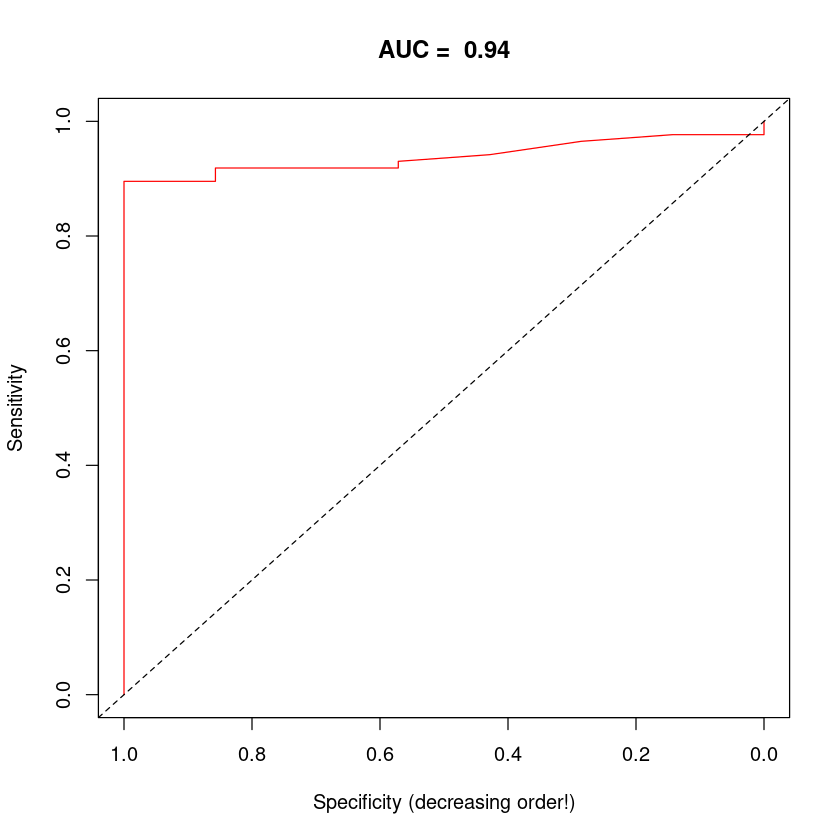

In [26]:
ylogical = (ytest == "YES")
ROCcrv = roc(response=ylogical, predictor=pihat) # make ROC curve
AUC = auc(ROCcrv) # area under the curve

plot(x=ROCcrv$specificities,y=ROCcrv$sensitivities, main=paste("AUC = ",round(AUC,2)), 
     xlab="Specificity (decreasing order!)", ylab="Sensitivity", xlim=c(1,0), type="l", col="red") # plotting ROC curve
abline(a=1,b=-1,lty="dashed") #the diagonal line
AUC

The ROC curve shows that it is worse than the ridge regression by just 0.02. Both ROC curves look very good and show very good accuracy. 

In [27]:
#creating yhat vector based on the rule: yhat=Yes if pihat>0.5; otherwise, yhat=No
yhat = ifelse(pihat>0.5,"Yes","No") 
tbl = table(yhat, ytest)
tbl

     ytest
yhat  NO YES
  No   0   2
  Yes  7  84

Looking at accuracy and false negative rate. 

In [28]:
acc = (tbl[1,1]+tbl[2,2])/sum(tbl) # accuracy
FNR = tbl[1,2]/sum(tbl[,2]) # false negative rate

print('Accuracy: ')
acc

print('False Negative Rate: ')
FNR
tbl

[1] "Accuracy: "


[1] 0.9032258

[1] "False Negative Rate: "


[1] 0.02325581

     ytest
yhat  NO YES
  No   0   2
  Yes  7  84

Accuracy is higher for Ridge regression and the false negative rate is lower as well<br><br>
Ridge:<br>
Accuracy = 0.913978494623656<br>
False Negative Rate = 0.0116279069767442<br><br>

Lasso:<br>
Accuracy = 0.903225806451613<br>
False Negative Rate = 0.0232558139534884

## Part 2 of Project: Naive Bayes 
Naive Bayes regression classifier is a type of machine learning algorithm based on the Bayes theorem conditional probability for prediction and is considered to be more accurate than other algorithms. 

In [29]:
library(e1071)
library(MASS)
library(caTools)
head(lung)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC.DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL.CONSUMING,COUGHING,SHORTNESS.OF.BREATH,SWALLOWING.DIFFICULTY,CHEST.PAIN,LUNG_CANCER
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
2,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
3,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
4,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
5,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
6,0,75,0,1,0,0,1,1,1,1,0,1,1,0,0,YES


In [30]:
split <- sample.split(lung, SplitRatio = 0.8)  #split data by 80% and 20%
train_set <- subset(lung, split == "TRUE") # train set
test_set <- subset(lung, split == "FALSE") # test set

rownames(train_set) <- 1:nrow(train_set)    # reset indices of train_set
rownames(test_set) <- 1:nrow(test_set)    #reset indices of test_set

print("Dimensions of test_set:")
dim(test_set)
print("Dimensions of train_set:")
dim(train_set)


[1] "Dimensions of test_set:"


[1] 77 16

[1] "Dimensions of train_set:"


[1] 232  16

In [31]:
testX = test_set[1:15] #test data all byt LUNG_CANCER variable
testy = test_set$LUNG_CANCER # only LUNG_CANCER variable

Model created using Naive Bayes fitting on training data

In [32]:
# model using naive bayes
# fit on training data, 
model = naiveBayes(LUNG_CANCER~.,data=train_set) 

Predict on test data

In [33]:
# predict on test data
y_pred <- predict(model, newdata = test_set)

Construct confusion matrix to calculate false negative rate and accuracy

In [34]:
#Confusion matrix 
cm <- table(test_set$LUNG_CANCER, y_pred)

In [35]:
cm

     y_pred
      NO YES
  NO   4   5
  YES  2  66

In [36]:
#false negative rate
FNR = cm[1,2]/sum(cm[,2])
FNR

[1] 0.07042254

In [37]:
# accuracy
accuracy = (cm[1,1]+cm[2,2])/sum(cm)
accuracy

[1] 0.9090909

## Comparison: Lasso/Ridge vs Naive Bayes

Ridge:<br>
Accuracy = 0.913978494623656 = 91.4%<br>
False Negative Rate = 0.0116279069767442 = 1.16%

Lasso:<br>
Accuracy = 0.903225806451613 = 90.32%<br>
False Negative Rate = 0.0232558139534884 = 2.33%

Naive Bayes:<br>
Accuracy = 0.909090909090909 = 90.9%<br>
False Negative Rate = 0.0704225352112676 = 7.04%

### Final Conclusion:

Ridge Regression seems to have the best prediction model with an accuracy of 91.4% and a false negative rate of 1.16%. When creating a predictive model I would choose to use Ridge regression. It has the highest accuracy and lowest false negative rate. Naive Bayes typically is better but not in this instance. I will show another example with diabetes data and as you can see at the end naive bayes will be better.

# Diabetes Data Set: Ridge Regression
https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset?resource=download



In [38]:
db <- read.csv(file = 'diabetes.csv')
head(db)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


### Data Cleaning
Looking at dimensions of the data set. There is 309 rows and 16 columns. With the column names listed below

In [39]:
dim(db)
colnames(db)

[1] 768   9

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

--------------------------------------------------------------------

Checking for NA entries in the data set. After looking there is 0 NA's in the data set.

In [40]:
sum(is.na(db))

[1] 0

In [41]:
db$Outcome <- as.character(db$Outcome)
db$Outcome[db$Outcome == '1'] <- 'Yes'
db$Outcome[db$Outcome == '0'] <- 'No'
head(db)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
1,6,148,72,35,0,33.6,0.627,50,Yes
2,1,85,66,29,0,26.6,0.351,31,No
3,8,183,64,0,0,23.3,0.672,32,Yes
4,1,89,66,23,94,28.1,0.167,21,No
5,0,137,40,35,168,43.1,2.288,33,Yes
6,5,116,74,0,0,25.6,0.201,30,No


### Age Distribution
As shownn in the histogram of Age in the Diabetes Data. The data only looks at ages 20 to 70 with a focus at younger people. Age range focus looked to be 20-35.

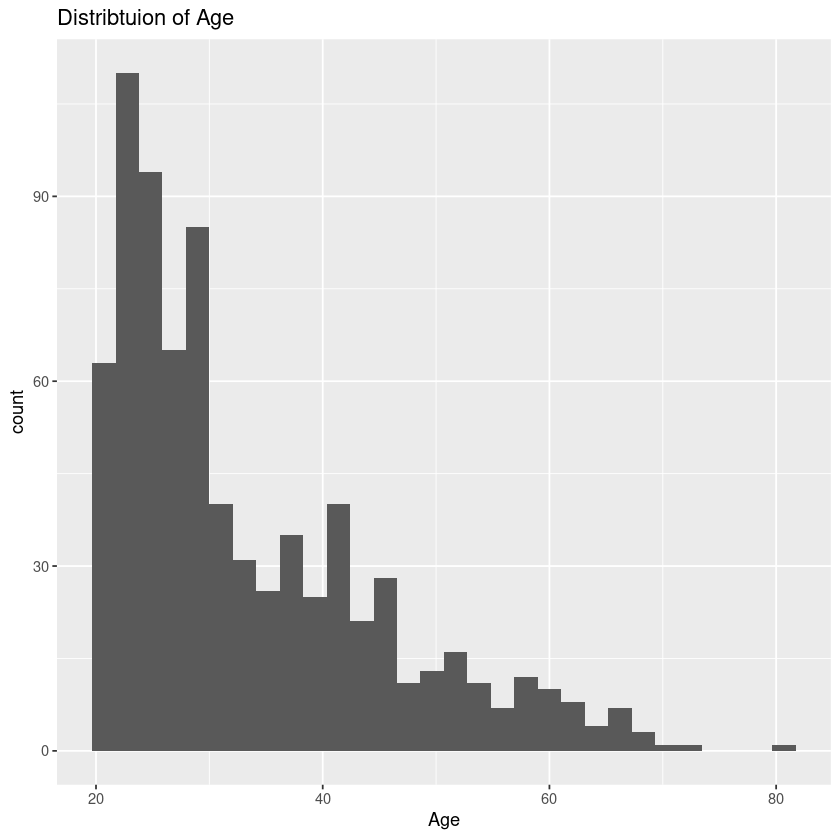

In [42]:
ggplot(db, aes(x=Age)) + geom_histogram(bins=30) + ggtitle("Distribtuion of Age") 

### Train-Test Split

I split the dataset into training and testing data at the ration 70/30. These two new data frame will be called train and test. Proportions are shown below to check.

In [43]:
set.seed(1234)
trainidx = sample(1:nrow(db),size=0.7*nrow(db),replace=FALSE)


train = db[trainidx, ]
test = db[-trainidx, ]

dim(train) #see the dimensions of train data frame

#check the proportions 70%-30% of data taken into the train and test data frames
noquote(paste("proportion of train data:",nrow(train)/nrow(db)))
noquote(paste("proportion of test data:",nrow(test)/nrow(db)))

[1] 537   9

[1] proportion of train data: 0.69921875

[1] proportion of test data: 0.30078125

Response vector y and predictor matrix X from diabetes without outcome variable

In [44]:
y = train$Outcome
X = train[ ,!(names(train) %in% c("Outcome"))] #all but Lung cancer variable
dim(X)

[1] 537   8

Predictor matrix X is actually an R data frame. In order to use it in the cv.glmnet() function from glmnet library, I convert it into an R matrix object

In [45]:
X = model.matrix( ~ . , data=X)[,-1]

dim(X)

X[1:5,]

[1] 537   8

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
284,7,161,86,0,0,30.4,0.165,47
101,1,163,72,0,0,39.0,1.222,33
623,6,183,94,0,0,40.8,1.461,45
645,3,103,72,30,152,27.6,0.730,27
400,3,193,70,31,0,34.9,0.241,25


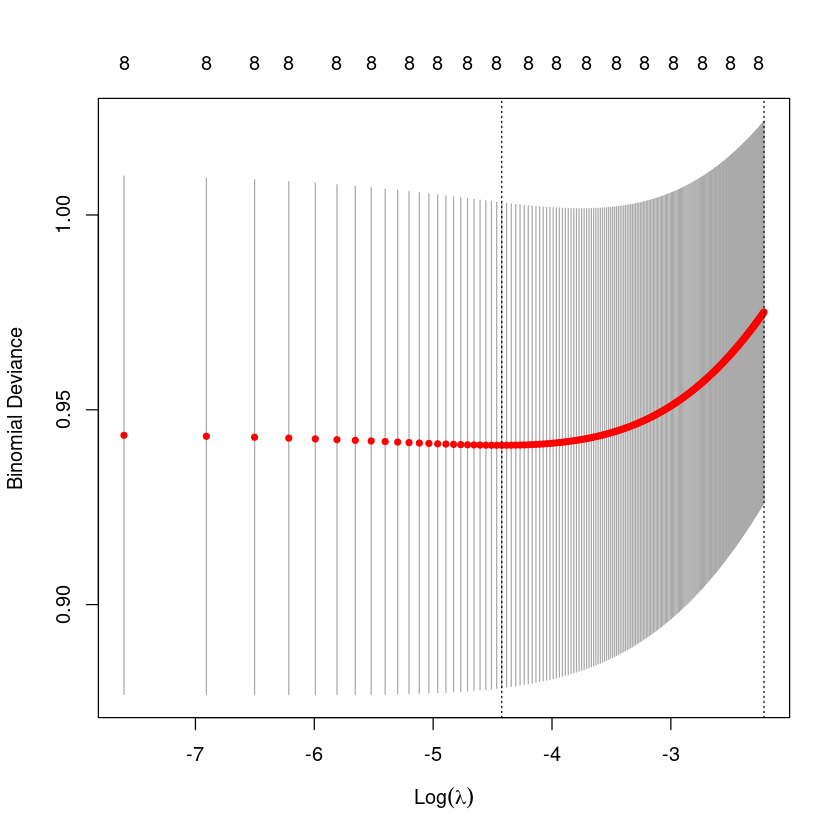

In [46]:
#setting lambda grid manually
mylambda=seq(0,0.109,by=0.0005) 

#Here, we use deviance as a measure performance.

#by default, for logistic regression, type.measure is "deviance"
cvfit = cv.glmnet(X,y,family = "binomial",lambda=mylambda,type.measure="deviance",
                  nfolds = 10, alpha = 0)  #alpha- ridge:0, lasso:1
#plot Ridge based on deviance
plot(cvfit)  #note on x-axis in the plot is log(lambda), not log(1/lambda)

In [47]:
coef(cvfit)

9 x 1 sparse Matrix of class "dgCMatrix"
                                    s1
(Intercept)              -5.6526525924
Pregnancies               0.0636242152
Glucose                   0.0193515572
BloodPressure            -0.0012595930
SkinThickness             0.0016650297
Insulin                   0.0001013618
BMI                       0.0445465218
DiabetesPedigreeFunction  0.5349574387
Age                       0.0183256014

In [48]:
#the value of optimal lambda that minimizes loss
cvfit$lambda.min

#the value of optimal lambda by the 1SE rule
cvfit$lambda.1se

[1] 0.012

[1] 0.109

### Predicting on Test Data

In [49]:
ytest = test$Outcome
Xtest = test[ ,!(names(test) %in% c("Outcome"))] 

Xtest = model.matrix( ~ ., data=Xtest)[,-1]
pihat = predict(object=cvfit, newx = Xtest, type="response")

length(pihat)
dim(Xtest)

[1] 231

[1] 231   8

### Measure Performance:

Setting levels: control = FALSE, case = TRUE

Warning message in roc.default(response = ylogical, predictor = pihat):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



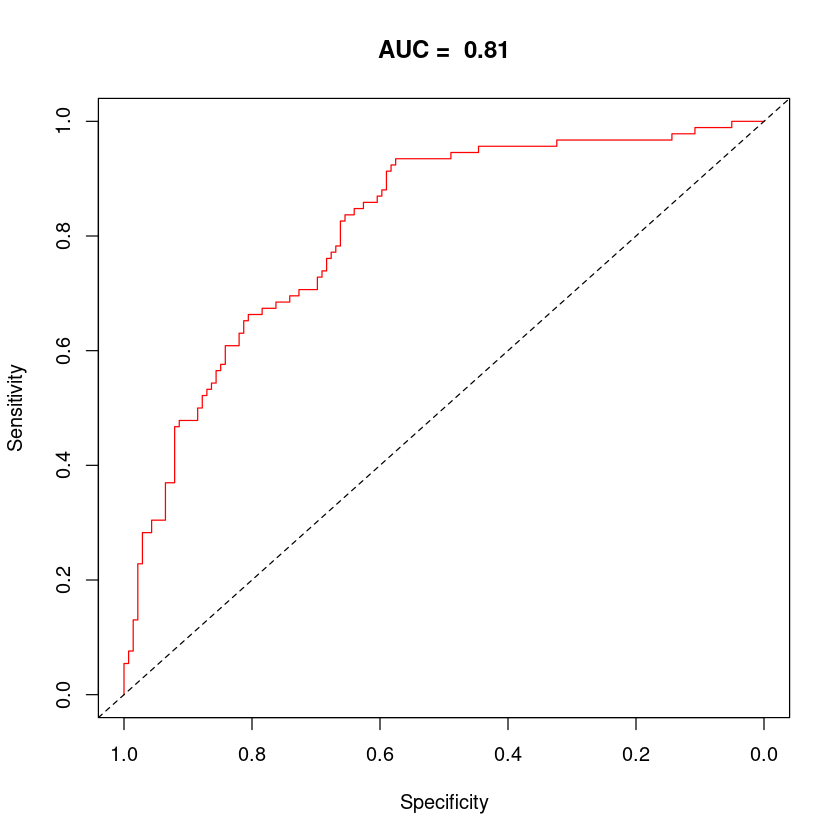

In [50]:
ylogical = (ytest == "Yes")
ROCcrv = roc(response=ylogical, predictor=pihat)
AUC = auc(ROCcrv)

plot(x=ROCcrv$specificities,y=ROCcrv$sensitivities, main=paste("AUC = ",round(AUC,2)), 
     xlab="Specificity", ylab="Sensitivity", xlim=c(1,0), type="l", col="red")
abline(a=1,b=-1,lty="dashed") #the diagonal line


This ROC curve is good but isn't great compared to the ones from the lung cancer data. Area under the curve is 0.81 so it is acceptable but barely.

In [51]:
AUC

Area under the curve: 0.8129

In [52]:
#creating yhat vector based on the rule: yhat=Yes if pihat>0.5; otherwise, yhat=No
yhat = ifelse(pihat>0.5,"Yes","No")

In [53]:
tbl = table(yhat, ytest)
tbl

     ytest
yhat   No Yes
  No  128  49
  Yes  11  43

In [54]:
# accuracy 
(tbl[1,1]+tbl[2,2])/sum(tbl)

[1] 0.7402597

In [55]:
# false negative rate
tbl[1,2]/sum(tbl[,2])

[1] 0.5326087

## Naive Bayes Diabetes:

In [56]:
split <- sample.split(db, SplitRatio = 0.8)  #split data by 80% and 20%
train_set <- subset(db, split == "TRUE")
test_set <- subset(db, split == "FALSE")

rownames(train_set) <- 1:nrow(train_set)    # reset indices of train_set
rownames(test_set) <- 1:nrow(test_set)    #reset indices of test_set

print("Dimensions of test_set:")
dim(test_set)
print("Dimensions of train_set:")
dim(train_set)

[1] "Dimensions of test_set:"


[1] 171   9

[1] "Dimensions of train_set:"


[1] 597   9

In [57]:
testX = test_set[1:8] #test data all by outcome variable
testy = test_set$Outcome # only outcome variable

In [58]:
# model using naive bayes
# fit on training data, 
model = naiveBayes(Outcome~.,data=train_set) 

In [59]:
#predict on test data
y_pred <- predict(model, newdata = test_set)

Warning message in data.matrix(newdata):
“NAs introduced by coercion”


In [60]:
#Confusion matrix 
cm <- table(test_set$Outcome, y_pred)
cm

     y_pred
      No Yes
  No  89  15
  Yes 30  37

In [61]:
FNR = cm[1,2]/sum(cm[,2])
FNR

[1] 0.2884615

In [62]:
accuracy = (cm[1,1]+cm[2,2])/sum(cm)
accuracy

[1] 0.7368421

# Comparison:
Ridge Regression is by far worse then Naive Bayes for the Diabetes data set. <br>

Ridge:<br>
Accuracy = 0.74025974025974<br>
False Negative Rate = 0.532608695652174

Naive Bayes:<br>
Accuracy = 0.736842105263158<br>
False Negative Rate = 0.288461538461538

### Final Result 
I would choose naive bayes for my model t predict here since a false negative rate of 50% is pretty bad. Naive bayes is accuracy is a little lower but the false negative is way down.

### Works Citied:
HW3 from class helped a lot in this project and HW1 using naive bayes